In [2]:
from simulation import *
from aesthetics import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [3]:
from plot import *

In [4]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.load = True
this.load_slope = 1
this.simulate()

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:242: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


In [4]:
concentrations = [10**i for i in np.arange(-6, 6, 0.1)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('adk_md_data', 'chi2THR175', concentrations)

100%|██████████| 120/120 [00:01<00:00, 72.49it/s]


In [5]:
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')

In [6]:
concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_10_directional_flux_above_10 = find_above_threshold(hiv_10, 'Directional flux', 10)
concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_10 = find_above_threshold(hiv_200, 'Directional flux', 10)

concentrations, hiv_10_reciprocating_flux_above_1 = find_above_threshold(hiv_10, 'Driven flux', 1)
concentrations, hiv_10_reciprocating_flux_above_10 = find_above_threshold(hiv_10, 'Driven flux', 10)
concentrations, hiv_200_reciprocating_flux_above_1 = find_above_threshold(hiv_200, 'Driven flux', 1)
concentrations, hiv_200_reciprocating_flux_above_10 = find_above_threshold(hiv_200, 'Driven flux', 10)


100%|██████████| 60/60 [00:00<00:00, 394.43it/s]


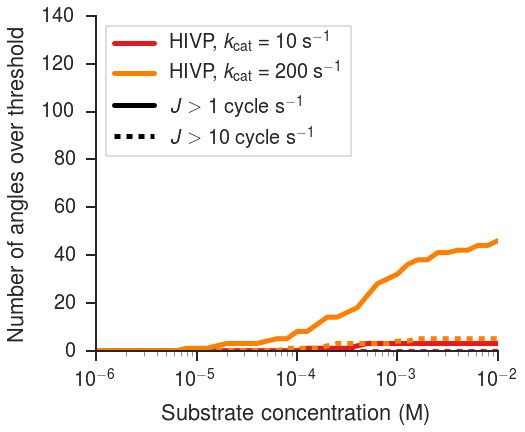

In [8]:
plot_flux_over_threshold(concentrations, [hiv_10_directional_flux_above_1,
                                         hiv_10_directional_flux_above_10,
                                         hiv_200_directional_flux_above_1,
                                         hiv_200_directional_flux_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J > 1$ cycle s$^{{-1}}$', r'$J > 10$ cycle s$^{{-1}}$'],
                        ymax=140)

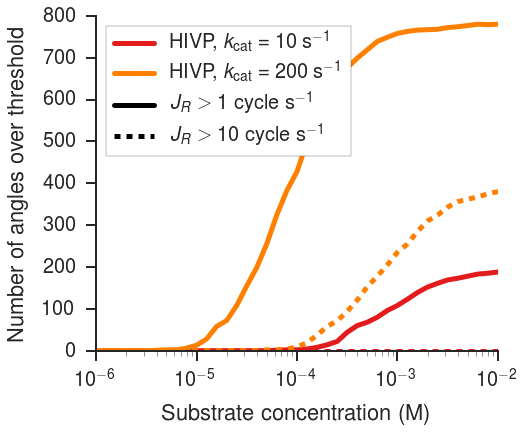

In [9]:
plot_flux_over_threshold(concentrations, [hiv_10_reciprocating_flux_above_1,
                                         hiv_10_reciprocating_flux_above_10,
                                         hiv_200_reciprocating_flux_above_1,
                                         hiv_200_reciprocating_flux_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J_R > 1$ cycle s$^{{-1}}$', r'$J_R > 10$ cycle s$^{{-1}}$'],
                        ymax=800)

In [12]:
adk_10 = pd.read_pickle('adk-low-catalytic-rate-10.pickle')
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')

concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)

concentrations, adk_10_directional_flux_above_1 = find_above_threshold(adk_10, 'Directional flux', 1)
concentrations, adk_312_directional_flux_above_1 = find_above_threshold(adk_312, 'Directional flux', 1)

100%|██████████| 60/60 [00:00<00:00, 286.62it/s]


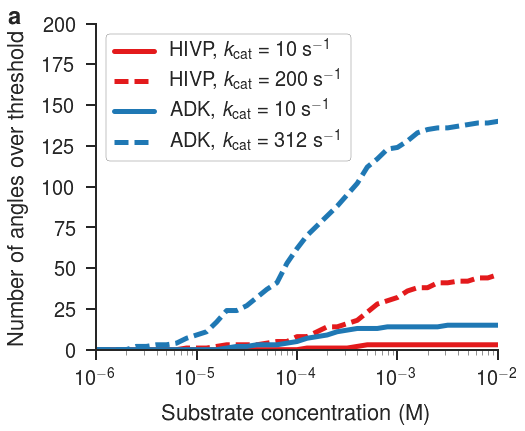

In [109]:
plot_flux_over_threshold(concentrations, [hiv_10_directional_flux_above_1,
                                         hiv_200_directional_flux_above_1,
                                         adk_10_directional_flux_above_1,
                                         adk_312_directional_flux_above_1], 
                         colors=[cmap[5], cmap[1]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$',
                               r'ADK, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'ADK, $k_\text{{cat}} = 312$ s$^{{-1}}$'],
                        ymax=200)
ax = plt.gca()
names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', 
       r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$',
       r'ADK, $k_\text{{cat}} = 10$ s$^{{-1}}$', 
       r'ADK, $k_\text{{cat}} = 312$ s$^{{-1}}$']
ax.legend(names, frameon=True, loc='upper left', edgecolor='k')
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.0)

In [85]:
hiv_10_reciprocating_only_above_1 = [i - j for i, j in zip(hiv_10_reciprocating_flux_above_1, hiv_10_directional_flux_above_1)]
hiv_10_reciprocating_only_above_10 = [i - j for i, j in zip(hiv_10_reciprocating_flux_above_10, hiv_10_directional_flux_above_10)]
hiv_200_reciprocating_only_above_1 = [i - j for i, j in zip(hiv_200_reciprocating_flux_above_1, hiv_200_directional_flux_above_1)]
hiv_200_reciprocating_only_above_10 = [i - j for i, j in zip(hiv_200_reciprocating_flux_above_10, hiv_200_directional_flux_above_10)]

plot_flux_over_threshold(concentrations, [hiv_10_reciprocating_only_above_1,
                                         hiv_10_reciprocating_only_above_10,
                                         hiv_200_reciprocating_only_above_1,
                                         hiv_200_reciprocating_only_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J_R > 1, J \leq 1$', r'$J_R > 10, J \leq 1$'],
                        ymax=800)

NameError: name 'hiv_10_reciprocating_flux_above_1' is not defined

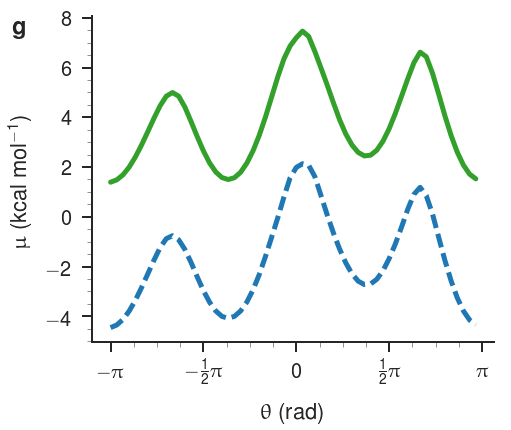

In [126]:
this = Simulation(data_source = 'adk_md_data')
this.name = 'chi1GLU75'
this.cSubstrate = 10**-3 # (M)
this.simulate()
plot_energy(this)
panel_label('g', panel_xoffset=-0.2)
# plot_flux(this)

In [12]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.simulate()

In [13]:
prepare_plot()
plot_input

<function plot.plot_input>

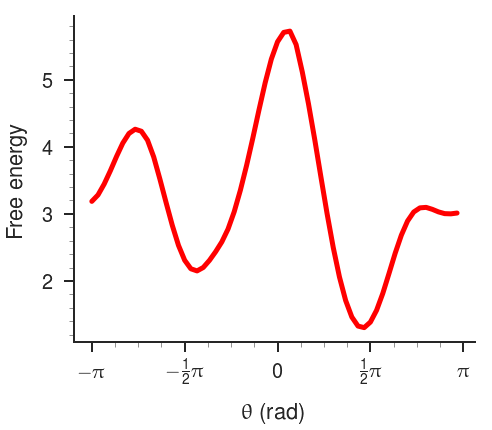

In [5]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(this.bins), this.unbound, c='r')
ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
paper_plot(fig, scientific=False)


In [17]:
this.unbound = [np.sin(i) for i in np.linspace(0, 6*np.pi, 60)]

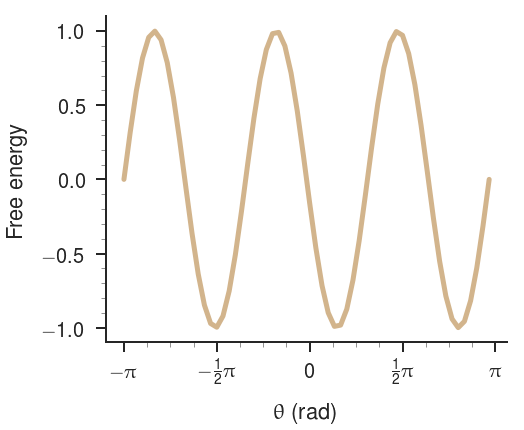

In [18]:
from matplotlib import colors as mcolors


fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(this.bins), this.unbound, c='tan')
ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
# ax1.set_ylim([1,6])
paper_plot(fig, scientific=False)

In [34]:
two = [np.sin(i) for i in np.linspace(0, 2*np.pi, 20)]
one = [2 * np.sin(i) for i in np.linspace(0, 2*np.pi, 20)]
three = [3 * np.sin(i) for i in np.linspace(0, 2*np.pi, 20)]
this.unbound = one + two + three

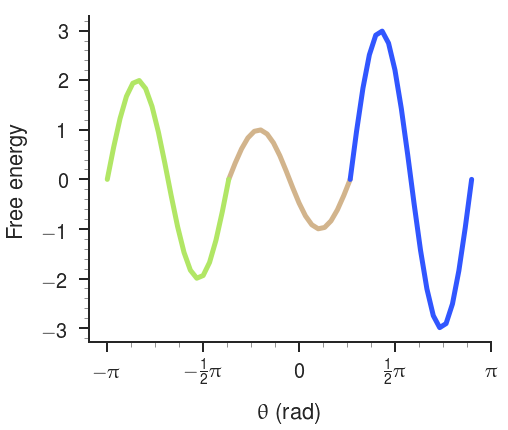

In [58]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(19, 39), two, c='tan')
ax1.plot(range(20), one, c=(0.694, 0.9, 0.396))
ax1.plot(range(38, 58), three, c=(0.192, 0.337, 1.0))
# ax1.plot([19, 20], [0, 0], c='tan')
# ax1.plot([39, 40], [0, 0], c='tan')


ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
# ax1.set_ylim([1,6])
paper_plot(fig, scientific=False)

In [40]:
86/255

0.33725490196078434

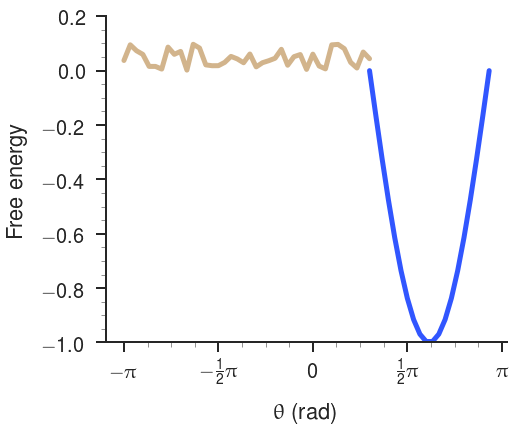

In [26]:
np.random.seed(42)
flatish = [0.1 * i for i in np.random.rand(40)]
dip = [np.sin(i) for i in np.linspace(np.pi, 2*np.pi, 20)]


fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(40), flatish, c='tan')
ax1.plot(range(39, 59), dip, c=(0.192, 0.337, 1.0))


ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
ax1.set_ylim([-1,0.2])
paper_plot(fig, scientific=False)

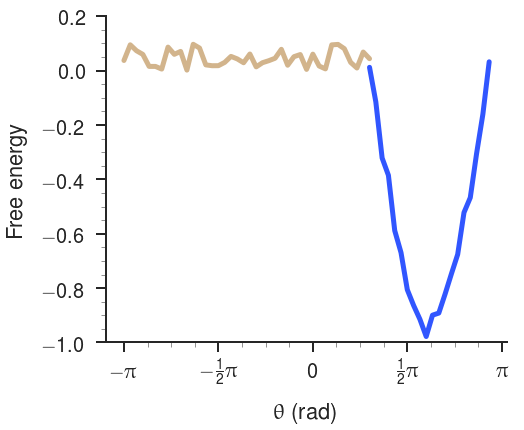

In [13]:
np.random.seed(42)
flatish = [0.1 * i for i in np.random.rand(40)]
dip = [np.sin(i)+0.1*j for i,j in zip(np.linspace(np.pi, 2*np.pi, 20), np.random.rand(20))]


fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(range(40), flatish, c='tan')
ax1.plot(range(39, 59), dip, c=(0.192, 0.337, 1.0))


ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
ax1.set_ylim([-1,0.2])
paper_plot(fig, scientific=False)

In [12]:
[print (i,j) for i,j in zip(np.linspace(np.pi, 2*np.pi, 20), np.random.rand(20))]

3.14159265359 0.863103425876
3.30693963536 0.623298126828
3.47228661713 0.330898024853
3.63763359889 0.063558350286
3.80298058066 0.310982321716
3.96832756243 0.325183322027
4.1336745442 0.729606178338
4.29902152596 0.637557471355
4.46436850773 0.887212742576
4.6297154895 0.472214925162
4.79506247127 0.119594245938
4.96040945304 0.713244787223
5.1257564348 0.760785048617
5.29110341657 0.561277197569
5.45645039834 0.770967179955
5.62179738011 0.493795596364
5.78714436188 0.522732829382
5.95249134364 0.427541018359
6.11783832541 0.0254191267441
6.28318530718 0.107891426993


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

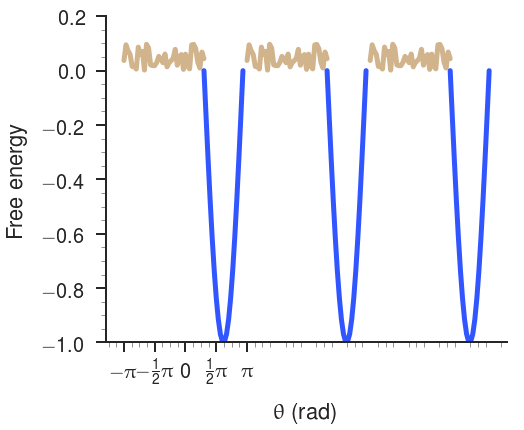

In [27]:
np.random.seed(42)
flatish = [0.1 * i for i in np.random.rand(40)]
dip = [np.sin(i) for i in np.linspace(np.pi, 2*np.pi, 20)]


fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(range(40), flatish, c='tan')
ax1.plot(range(39, 59), dip, c=(0.192, 0.337, 1.0))

ax1.plot(range(60,100), flatish, c='tan')
ax1.plot(range(99, 119), dip, c=(0.192, 0.337, 1.0))

ax1.plot(range(120,160), flatish, c='tan')
ax1.plot(range(159, 179), dip, c=(0.192, 0.337, 1.0))


ax1.set_xticks([0, this.bins / 4, this.bins / 2, 3 * this.bins / 4, this.bins])
ax1.set_xticklabels(
        [r'$-\pi$', r'$-\frac{1}{2}\pi{}$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
ax1.set_xlabel(r'$\theta$ (rad)')
ax1.set_ylabel(r'Free energy')
ax1.set_ylim([-1,0.2])
paper_plot(fig, scientific=False)

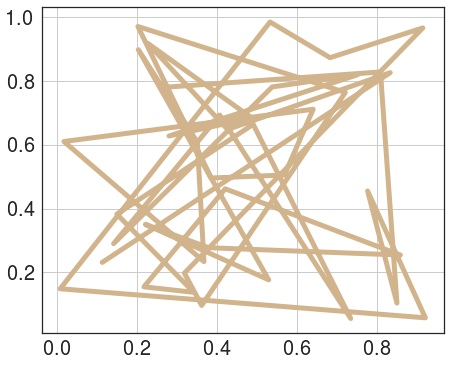

In [8]:
prepare_plot()
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(np.random.rand(40), np.random.rand(40), c='tan')
ax1.grid()